In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress

In [2]:
#Reading Data
file_path = 'Resources/Clean_EV_Data.csv'
df = pd.read_csv(file_path)
ev_path = 'Resources/Clean_EV_Data.csv'
ev_df = pd.read_csv(ev_path)
census_path = 'Resources/2022_census.txt'
cen_df = pd.read_csv(census_path)
population_file_path = 'Resources/zipcode_population.csv'
population_df = pd.read_csv(population_file_path)
charging_station_file_path = 'Resources/charging_stations(2022).csv'
cs_df = pd.read_csv(charging_station_file_path)

In [3]:
# merge census and EV data in order to compute regression and relationships
cen_df = cen_df.rename(columns={'WA Zipcode':'Postal Code'})
ev_cen = cen_df.merge(ev_df, on='Postal Code').reset_index()
# clean dataframe to include only the columns we are working with
clean_merged_df = ev_cen[['Census Year',
                          'Postal Code',
                          'Population',
                          'Median Household Income',
                          'Income Per Capita',
#                           'County',
                          'Make',
                          'Model',
                          'Electric Vehicle Type']]
clean_merged_df

clean_merged_df = clean_merged_df[['Postal Code','Income Per Capita']]
income_df = clean_merged_df.drop_duplicates()
income_df

,Postal Code,Income Per Capita
0,98901,25237.0
69,98237,31650.0
90,98201,41730.0
340,98021,67017.0
1496,98203,44288.0
...,...,...
112241,99131,31798.0
112242,99348,32056.0
112243,98336,30549.0
112244,98935,18814.0


In [4]:
#Merging Data Frames
charging_station_by_population_df = pd.merge(cs_df,population_df)
charging_station_by_population_df

,Postal Code,Number of Charging Stations,Unnamed: 0,Population,Electric Vehicle Type,Population Percent
0,98052,27,45,77324,2916,3.771145
1,98033,20,77,40425,2059,5.093383
2,98004,116,86,39161,2001,5.109675
3,98115,6,20,54457,1880,3.452265
4,98006,14,115,39753,1852,4.658768
...,...,...,...,...,...,...
491,98263,0,468,178,1,0.561798
492,98326,0,472,1066,1,0.093809
493,98283,2,473,466,1,0.214592
494,98530,0,474,558,1,0.179211


In [5]:
#Calculating Charging Stations per Capita
charging_station_by_population_df['Charging Stations/Capita'] = (charging_station_by_population_df['Number of Charging Stations']/charging_station_by_population_df['Population'])*100

charging_station_by_population_df
charging_station_by_population_df.sort_values(by='Charging Stations/Capita', ascending=False)

,Postal Code,Number of Charging Stations,Unnamed: 0,Population,Electric Vehicle Type,Population Percent,Charging Stations/Capita
479,98164,13,378,239,1,0.418410,5.439331
182,98134,24,344,852,158,18.544601,2.816901
430,98288,3,384,180,3,1.666667,1.666667
469,98575,1,479,134,1,0.746269,0.746269
374,98345,2,37,284,8,2.816901,0.704225
...,...,...,...,...,...,...,...
327,98828,0,365,2075,18,0.867470,0.000000
328,98925,0,407,533,17,3.189493,0.000000
331,99036,0,332,1546,16,1.034929,0.000000
332,98635,0,413,1975,16,0.810127,0.000000


In [26]:
#Merging with Income Data
merged_income_df = pd.merge(charging_station_by_population_df,income_df,on='Postal Code',how='outer')
merged_income_df

#Removing Outliers
merged_income_df_filtered = merged_income_df[merged_income_df['Charging Stations/Capita']<1.5]
merged_income_df_filtered = merged_income_df_filtered[merged_income_df_filtered['Population Percent']<15]
merged_income_df_filtered = merged_income_df_filtered[merged_income_df_filtered['Income Per Capita']<200000]
merged_income_df_filtered = merged_income_df_filtered[merged_income_df_filtered['Number of Charging Stations']<100]


merged_income_df_filtered

,Postal Code,Number of Charging Stations,Unnamed: 0,Population,Electric Vehicle Type,Population Percent,Charging Stations/Capita,Income Per Capita
0,98052,27,45,77324,2916,3.771145,0.034918,82929.0
1,98033,20,77,40425,2059,5.093383,0.049474,102001.0
3,98115,6,20,54457,1880,3.452265,0.011018,80879.0
4,98006,14,115,39753,1852,4.658768,0.035217,84234.0
5,98012,2,106,75555,1850,2.448547,0.002647,58143.0
...,...,...,...,...,...,...,...,...
491,98263,0,468,178,1,0.561798,0.000000,38803.0
492,98326,0,472,1066,1,0.093809,0.000000,23750.0
493,98283,2,473,466,1,0.214592,0.429185,21288.0
494,98530,0,474,558,1,0.179211,0.000000,21641.0


The r-value is 0.23


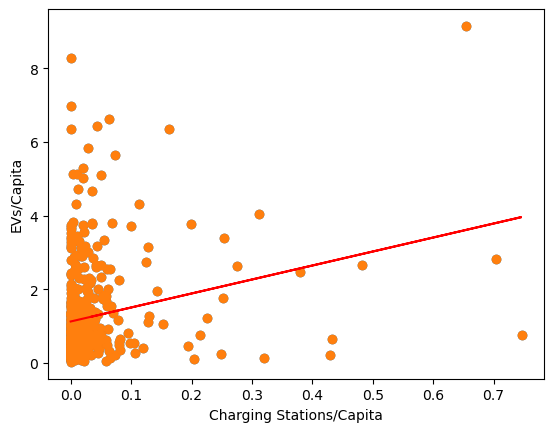

In [27]:
#Scatterplot - Charging Stations per Capita vs EVs by Capita
plt.scatter(merged_income_df_filtered['Charging Stations/Capita'],
            merged_income_df_filtered['Population Percent'])

x_values = merged_income_df_filtered['Charging Stations/Capita']
y_values = merged_income_df_filtered['Population Percent']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
rvalue = str(round(rvalue, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, '-r')
plt.annotate(line_eq,(2,15), fontsize=15, color='red')
plt.annotate(f'The r-value is {rvalue}',(1.9,13), fontsize=15, color='red')
plt.xlabel('Charging Stations/Capita')
plt.ylabel('EVs/Capita')
print(f'The r-value is {rvalue}')

The r-value is 0.12


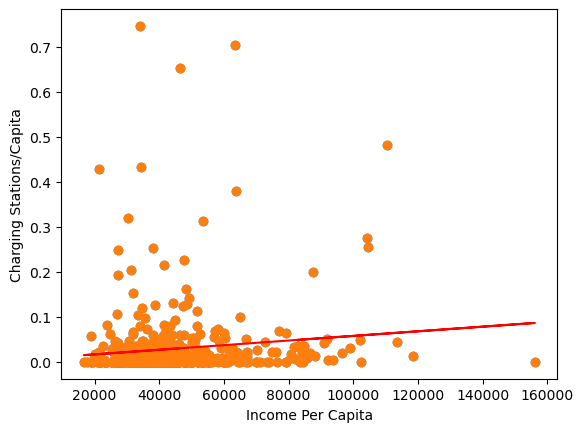

In [28]:
#Scatterplot - Charging Stations per Capita vs Income per Capita
plt.scatter(merged_income_df_filtered['Income Per Capita'],
            merged_income_df_filtered['Charging Stations/Capita'])

x_values = merged_income_df_filtered['Income Per Capita']
y_values = merged_income_df_filtered['Charging Stations/Capita']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
rvalue = str(round(rvalue, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, '-r')
plt.annotate(line_eq,(2,15), fontsize=15, color='red')
plt.annotate(f'The r-value is {rvalue}',(1.9,13), fontsize=15, color='red')
plt.xlabel('Income Per Capita')
plt.ylabel('Charging Stations/Capita')
print(f'The r-value is {rvalue}')

The r-value is 0.35


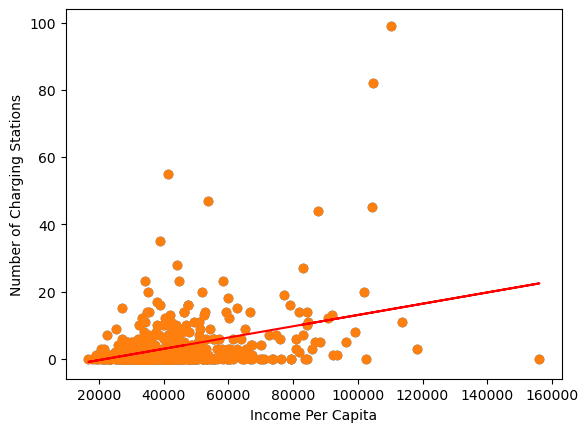

In [29]:
#Scatterplot - Total Charging Stations vs Income per Capita
plt.scatter(merged_income_df_filtered['Income Per Capita'],
            merged_income_df_filtered['Number of Charging Stations'])

x_values = merged_income_df_filtered['Income Per Capita']
y_values = merged_income_df_filtered['Number of Charging Stations']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
rvalue = str(round(rvalue, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, '-r')
plt.annotate(line_eq,(2,15), fontsize=15, color='red')
plt.annotate(f'The r-value is {rvalue}',(1.9,13), fontsize=15, color='red')
plt.xlabel('Income Per Capita')
plt.ylabel('Number of Charging Stations')
print(f'The r-value is {rvalue}')

The r-value is 0.41


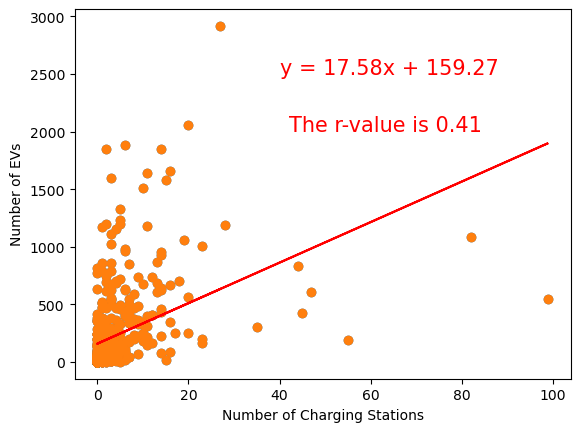

In [32]:
#Scatterplot - Total Charging Stations vs Total EVs

plt.scatter(merged_income_df_filtered['Number of Charging Stations'],
            merged_income_df_filtered['Electric Vehicle Type'])

x_values = merged_income_df_filtered['Number of Charging Stations']
y_values = merged_income_df_filtered['Electric Vehicle Type']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
rvalue = str(round(rvalue, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, '-r')
plt.annotate(line_eq,(40,2500), fontsize=15, color='red')
plt.annotate(f'The r-value is {rvalue}',(42,2000), fontsize=15, color='red')
plt.xlabel('Number of Charging Stations')
plt.ylabel('Number of EVs')
print(f'The r-value is {rvalue}')